,id,age,genre,departement,GPA_s1,taux_presence,h_en_ligne,travaux_soumis,ren_directeur,trav_partiel,risque
0,1,24,1.0,1.0,2.15,60.8,5,12,1,0,0
1,2,21,0.0,0.0,3.00,75.3,6,5,0,0,0
2,3,28,0.0,1.0,2.53,98.3,4,9,1,0,0
3,4,25,0.0,1.0,3.43,97.4,9,7,0,0,0
4,5,22,0.0,0.0,3.26,84.2,6,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,26,0.0,0.0,1.35,82.7,7,11,1,0,0
4996,4997,18,0.0,1.0,2.87,74.7,8,5,1,0,0
4997,4998,19,0.0,1.0,2.17,89.1,3,4,0,0,0
4998,4999,19,0.0,1.0,3.50,84.7,5,8,0,0,1


Rapport de classification (seuil = 0.7):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       851
           1       0.00      0.00      0.00       149

    accuracy                           0.85      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.72      0.85      0.78      1000



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


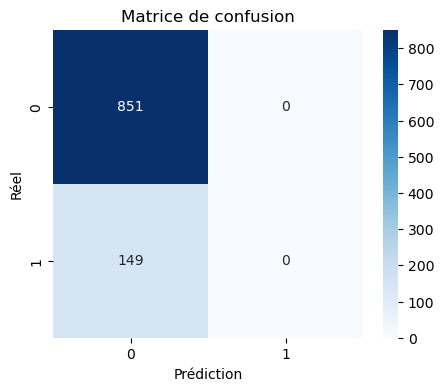

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Charger le dataset ---

dt = pd.read_csv('decrochage_scolaire_clean.csv')
dt


# --- 2. Préparer les données ---

target_column = 'risque'

# Séparer les caractéristiques (X) de la cible (y)
X = dt.drop(['id', target_column], axis=1) # 'id' est souvent juste un identifiant, 'risque' est la cible
y = dt[target_column]

# Gérer les colonnes catégorielles (non numériques)

X = pd.get_dummies(X, columns=['genre', 'departement'], drop_first=True)

# --- 3. Séparer les données en ensembles d'entraînement et de test ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 4. Entraîner le modèle en privilégiant la classe majoritaire ---

model = LogisticRegression(random_state=42, solver='liblinear') # solver='liblinear' est bon pour les petits datasets

model.fit(X_train, y_train)

# --- 5. Ajuster le seuil de classification pour favoriser la classe majoritaire ---

y_pred_proba = model.predict_proba(X_test)[:, 1]

# Définir un seuil élevé. Plus le seuil est élevé (proche de 1),

seuil_pour_favoriser_majoritaire = 0.7 # Vous pouvez expérimenter avec 0.6, 0.8, etc.

# Appliquer le nouveau seuil pour obtenir les prédictions finales
y_pred_final = (y_pred_proba >= seuil_pour_favoriser_majoritaire).astype(int)

# --- 6. Évaluer le modèle avec les métriques appropriées ---
print(f"Rapport de classification (seuil = {seuil_pour_favoriser_majoritaire}):")
print(classification_report(y_test, y_pred_final))



plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()


